# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")
import plotly
import cufflinks as cf
cf.go_offline()

In [3]:
interest_rates = pd.read_excel('INTEREST RATES ON TRY MONTHLY.xlsx')
house_prices = pd.read_excel('IST - HOUSE PRICE MONTHLY.xlsx')
usd_try = pd.read_excel('USD-TRY MONTHLY.xlsx')

# Pre - Process

In [18]:
interest_rates.describe()

,Tarih,TP MT210AGS TRY MT01,Unnamed: 2
count,124,126.00,6
unique,123,118.00,6
top,TP.MT210AGS.TRY.MT01,8.19,Central Bank of Turkey
freq,2,3.00,1


In [19]:
interest_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
Tarih                   124 non-null object
TP MT210AGS TRY MT01    126 non-null object
Unnamed: 2              6 non-null object
dtypes: object(3)
memory usage: 3.2+ KB


In [30]:
interest_rates.tail(12)

,Tarih,TP MT210AGS TRY MT01,Unnamed: 2
119,2019-12,10.37,NaN
120,NaN,NaN,NaN
121,NaN,NaN,NaN
122,Series Descriptions,NaN,NaN
123,TP.MT210AGS.TRY.MT01,Up to 1 Month(TRY Deposits)-Level,Observation: Original Observation
124,NaN,NaN,NaN
125,Notes,NaN,NaN
126,TP.MT210AGS.TRY.MT01,Datasource,Central Bank of Turkey
127,NaN,Data Release Calendar,http://www3.tcmb.gov.tr/veriyaytakvim/calendar...
128,NaN,Metadata Link,http://www.tcmb.gov.tr/wps/wcm/connect/2ad23d7...


In [4]:
interest_rates.drop(interest_rates.tail(11).index,inplace=True)

In [40]:
interest_rates.columns.values

array(['Tarih', 'TP MT210AGS TRY MT01', 'Unnamed: 2'], dtype=object)

In [5]:
interest_rates.drop('Unnamed: 2',axis=1,inplace = True)

In [6]:
interest_rates.rename(columns={'Tarih':'Date','TP MT210AGS TRY MT01':'Interest Rate'},inplace = True)

In [48]:
interest_rates.head()

,Date,Interest Rate
0,2010-01,8.07
1,2010-02,7.81
2,2010-03,8.05
3,2010-04,8.06
4,2010-05,8.25


In [50]:
usd_try.tail(9)

,Tarih,TP DK USD A YTL,Unnamed: 2
119,2019-12,5.83763,NaN
120,NaN,NaN,NaN
121,NaN,NaN,NaN
122,Series Descriptions,NaN,NaN
123,TP.DK.USD.A.YTL,(USD) US Dollar (Buying)-Level,Observation: Original Observation
124,NaN,NaN,NaN
125,Notes,NaN,NaN
126,TP.DK.USD.A.YTL,Datasource,CBRT
127,NaN,Tags,"Exchange, Rates, Daily,"


In [7]:
usd_try.rename(columns={'Tarih':'Date','TP DK USD A YTL':'USD/TRY'},inplace = True)
usd_try.drop('Unnamed: 2',axis=1,inplace = True)
usd_try.drop(usd_try.tail(8).index,inplace=True)

In [52]:
usd_try.tail()

,Date,USD/TRY
115,2019-08,5.62479
116,2019-09,5.7128
117,2019-10,5.78454
118,2019-11,5.73123
119,2019-12,5.83763


In [57]:
house_prices.tail(11)

,Tarih,TP TCBF02 ISTANBUL,Unnamed: 2
119,2019-12,4938.32,NaN
120,NaN,NaN,NaN
121,NaN,NaN,NaN
122,Series Descriptions,NaN,NaN
123,TP.TCBF02.ISTANBUL,Housing Unit Prices for Istanbul - TL/sq m-Level,Observation: End
124,NaN,NaN,NaN
125,Notes,NaN,NaN
126,TP.TCBF02.ISTANBUL,Datasource,CBRT
127,NaN,Data Release Calendar,http://www3.tcmb.gov.tr/veriyaytakvim/takvim.php
128,NaN,Tags,"HPI, HHPI, House, Price, Index, Hedonic, House..."


In [8]:
house_prices.rename(columns={'Tarih':'Date','TP TCBF02 ISTANBUL':'Istanbul/House Price'},inplace = True)
house_prices.drop('Unnamed: 2',axis=1,inplace = True)
house_prices.drop(house_prices.tail(10).index,inplace=True)

In [59]:
house_prices.tail()

,Date,Istanbul/House Price
115,2019-08,4698.04
116,2019-09,4747.18
117,2019-10,4809.3
118,2019-11,4895.81
119,2019-12,4938.32


In [11]:
house_prices['Date'] = pd.to_datetime(house_prices['Date'], format = '%Y-%m')
usd_try['Date'] = pd.to_datetime(usd_try['Date'], format = '%Y-%m')
interest_rates['Date'] = pd.to_datetime(interest_rates['Date'], format = '%Y-%m')

In [73]:
type(house_prices['Istanbul/House Price'][0])

float

In [12]:
data = usd_try.merge(house_prices)
data = data.merge(interest_rates)

In [13]:
data.set_index('Date',inplace = True)

In [14]:
data['Istanbul House Price/1000'] = data['Istanbul/House Price']/1000 

In [15]:
data.rename(columns = {'Istanbul/House Price' : 'Istanbul House Price'},inplace = True)

In [18]:
data['Interest Rate/5'] = data['Interest Rate']/5

In [19]:
data['Interest Rate/5'] = data['Interest Rate/5'].apply(lambda x: float(x))
data['Istanbul House Price/1000'] = data['Istanbul House Price/1000'].apply(lambda x: float(x))
data['USD/TRY'] = data['USD/TRY'].apply(lambda x: float(x))

In [22]:
data['Istanbul House Price'] = data['Istanbul House Price'].apply(lambda x: float(x))
data['Interest Rate'] = data['Interest Rate'].apply(lambda x: float(x))

# Visualization

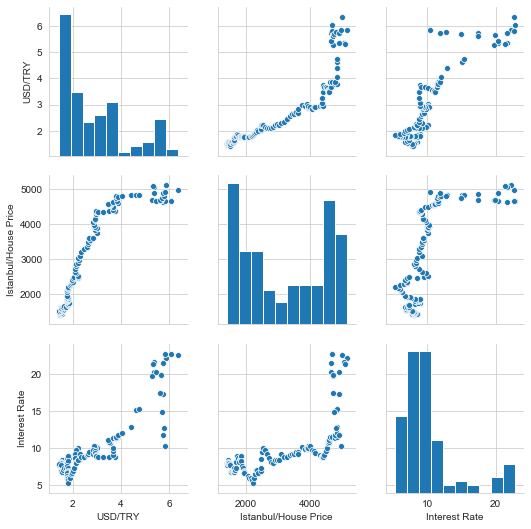

In [87]:
sns.pairplot(data)

In [124]:
data.drop(['Istanbul House Price','Interest Rate','Interest Rate/10'],axis = 1).iplot()

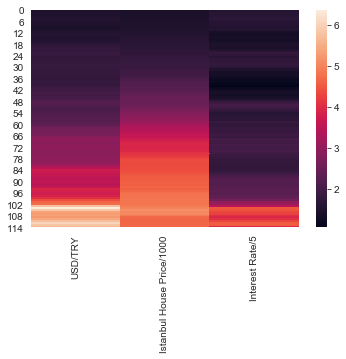

In [285]:
sns.heatmap(data.reset_index()[['USD/TRY','Istanbul House Price/1000','Interest Rate/5']])

In [254]:
data.drop(['Istanbul House Price/1000','Interest Rate/5'],axis =1).corr()

,USD/TRY,Istanbul House Price,Interest Rate
USD/TRY,1.000000,0.888268,0.885388
Istanbul House Price,0.888268,1.000000,0.697317
Interest Rate,0.885388,0.697317,1.000000


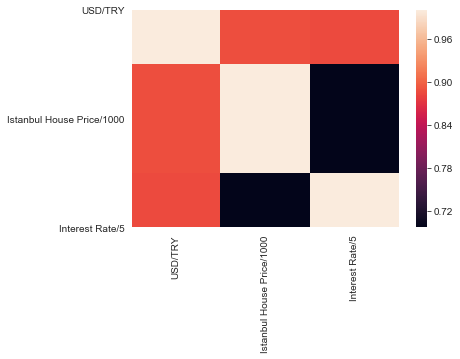

In [243]:
sns.heatmap(data.corr())

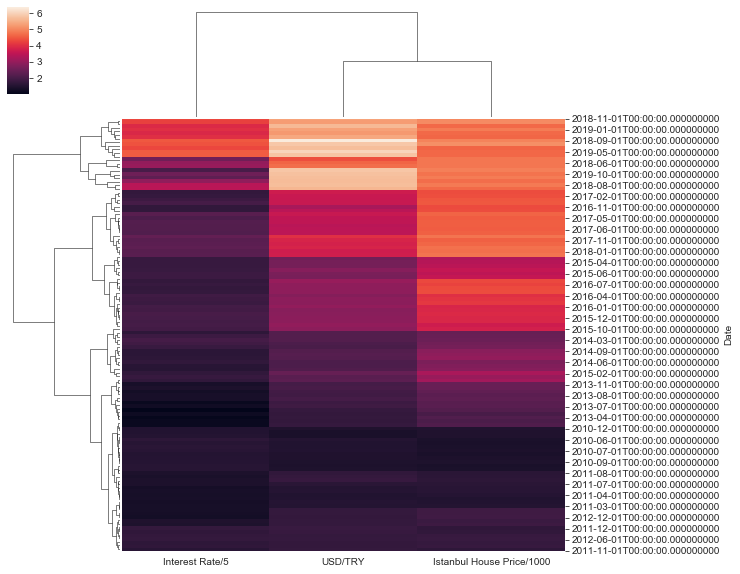

In [287]:
sns.clustermap(data[['USD/TRY','Istanbul House Price/1000','Interest Rate/5']])

In [257]:
X = data[['Interest Rate','USD/TRY']]
y = data['Istanbul House Price']

In [258]:
from sklearn.model_selection import train_test_split

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
lm = LinearRegression()
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [263]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [264]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Interest Rate,-242.392806
USD/TRY,1602.114977


In [265]:
predictions = lm.predict(X_test)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(0, 0.5, 'Predictions')

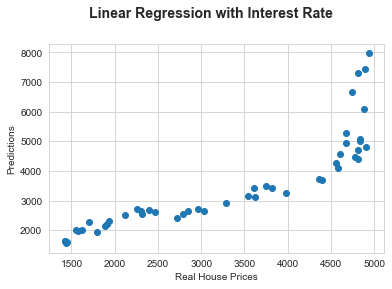

In [281]:
fig = plt.figure()
fig.suptitle('Linear Regression with Interest Rate', fontsize=14, fontweight='bold')
plt.scatter(y_test,predictions)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Real House Prices')
ax.set_ylabel('Predictions')

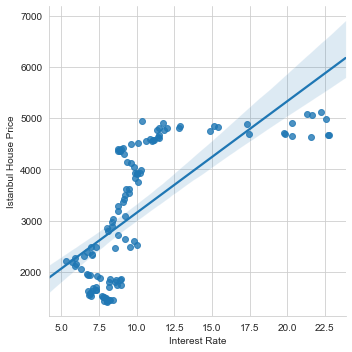

In [283]:
sns.lmplot(x='Interest Rate',y='Istanbul House Price',data=data)

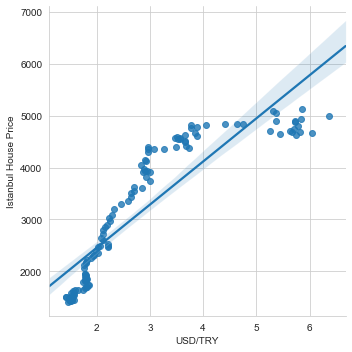

In [284]:
sns.lmplot(x='USD/TRY',y='Istanbul House Price',data=data)

In [282]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 526.633053546041
MSE: 683158.473009867
RMSE: 826.5340120103147


# 

In [289]:
from pandas.plotting import autocorrelation_plot

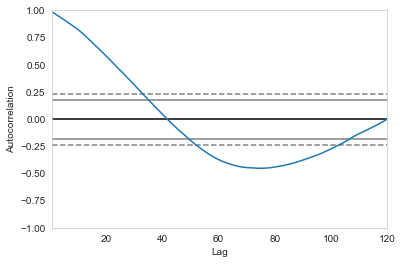

In [292]:
autocorrelation_plot(data['Istanbul House Price'])

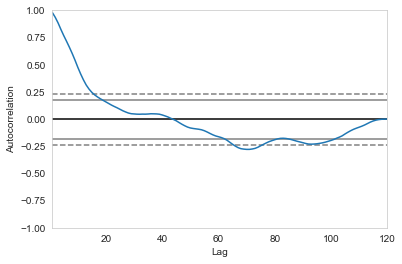

In [293]:
autocorrelation_plot(data['Interest Rate'])

In [295]:
from statsmodels.tsa.arima_model import ARIMA

In [302]:
model = ARIMA(data['Istanbul House Price'], order=(10,2,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                ARIMA Model Results                                
Dep. Variable:     D2.Istanbul House Price   No. Observations:                  118
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -610.660
Method:                            css-mle   S.D. of innovations             42.559
Date:                     Fri, 17 Apr 2020   AIC                           1245.319
Time:                             23:12:53   BIC                           1278.568
Sample:                         03-01-2010   HQIC                          1258.819
                              - 12-01-2019                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2259      0.972      0.232      0.817      -1.680       2.131
ar.L1.D2.Istanbul House Price  

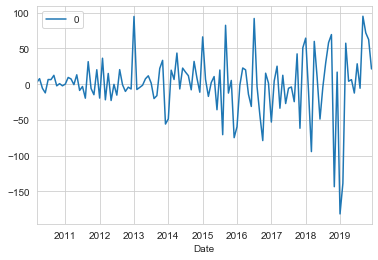

In [303]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()